<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第12章『二次元の統計入門』" data-toc-modified-id="第12章『二次元の統計入門』-1">第12章『二次元の統計入門』</a></span><ul class="toc-item"><li><span><a href="#p.8~10" data-toc-modified-id="p.8~10-1.1">p.8~10</a></span></li><li><span><a href="#p.16~19" data-toc-modified-id="p.16~19-1.2">p.16~19</a></span></li><li><span><a href="#p.25~27" data-toc-modified-id="p.25~27-1.3">p.25~27</a></span></li></ul></li></ul></div>

# 第12章『二次元の統計入門』

## p.8~10

In [1]:
jddata <- read.csv("./data/jddata.csv")

In [2]:
PCA <- prcomp(jddata, scale=FALSE)
PCA$x[,1]
PCA$x[,2]
PCA$sdev
PCA$rotation

[1] -4.8836911  3.6830938 -2.8206411 -4.0212385  0.9908742  1.3054590 -2.0630500
[8] 17.7862992 -9.9771054

[1] -1.0721758 -1.8533268 -0.2097232 -3.1352259  5.7461438  1.5151821 -0.8624527
[8] -0.8047109  0.6762894

[1] 7.781222 2.540194

,PC1,PC2
H,0.6527295,0.7575911
W,0.7575911,-0.6527295


In [3]:
summary(PCA)

Importance of components:
                          PC1     PC2
Standard deviation     7.7812 2.54019
Proportion of Variance 0.9037 0.09631
Cumulative Proportion  0.9037 1.00000

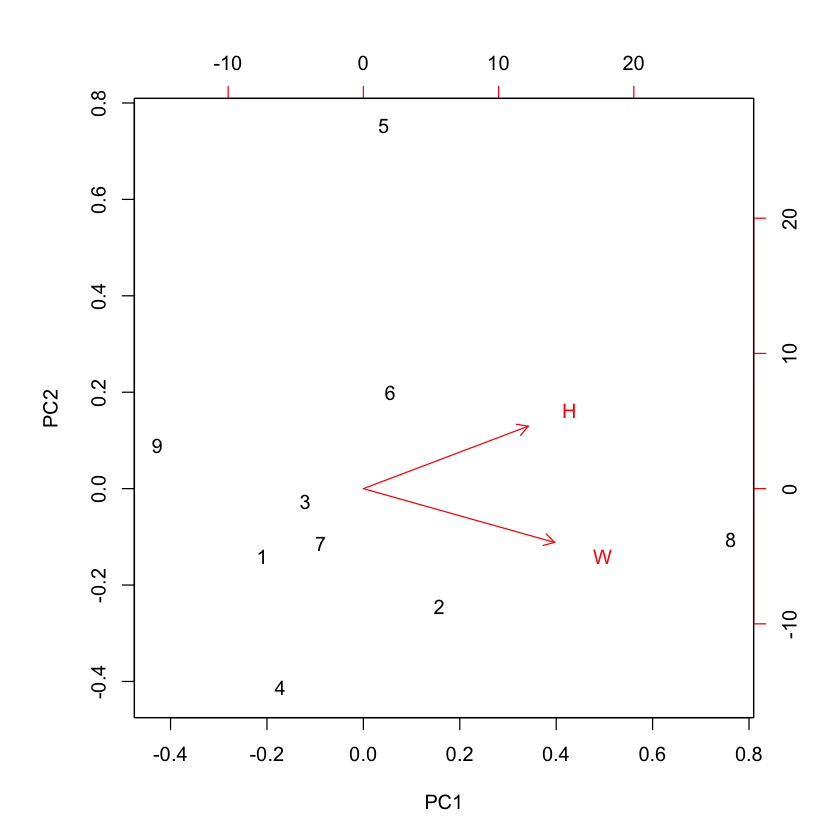

In [4]:
biplot(PCA, choices=c(1, 2))

## p.16~19

In [5]:
library(MASS)

In [6]:
wine_training <- read.csv("./data/wine_trainingdata.csv")
wine_test <- read.csv("./data/wine_testdata.csv")

In [7]:
lda1 <- lda(group~color1, prior=c(1/2, 1/2), data=wine_training)
qda1 <- qda(group~color1, prior=c(1/2, 1/2), data=wine_training)

In [8]:
lda1

Call:
lda(group ~ color1, data = wine_training, prior = c(1/2, 1/2))

Prior probabilities of groups:
 G1  G2 
0.5 0.5 

Group means:
     color1
G1 1.069362
G2 1.105719

Coefficients of linear discriminants:
            LD1
color1 6.199105

In [9]:
result_lda1 <- predict(lda1, wine_test)
result_qda1 <- predict(qda1, wine_test)

In [10]:
table(wine_test$group, result_lda1$class)
table(wine_test$group, result_qda1$class)

    
     G1 G2
  G1  8  4
  G2 14  0

    
     G1 G2
  G1 10  2
  G2  6  8

In [11]:
lda2 <- lda(group~., prior=c(1/2, 1/2), data=wine_training)
qda2 <- qda(group~., prior=c(1/2, 1/2), data=wine_training)

In [12]:
lda2

Call:
lda(group ~ ., data = wine_training, prior = c(1/2, 1/2))

Prior probabilities of groups:
 G1  G2 
0.5 0.5 

Group means:
     color1   color2
G1 1.069362 5.266809
G2 1.105719 3.145789

Coefficients of linear discriminants:
              LD1
color1  0.5931678
color2 -0.9714589

In [13]:
result_lda2 <- predict(lda2, wine_test)
result_qda2 <- predict(qda2, wine_test)

In [14]:
table(wine_test$group, result_lda2$class)
table(wine_test$group, result_qda2$class)

    
     G1 G2
  G1 12  0
  G2  1 13

    
     G1 G2
  G1 12  0
  G2  1 13

## p.25~27

In [15]:
players <- read.csv("./data/players.csv", row.names=1, fileEncoding="sjis")

In [16]:
players.d <- dist(players)

In [17]:
result <- hclust(players.d, method="ward.D2") # 改良版の方が良いのでは？ # dataset.d ではない！
result


Call:
hclust(d = players.d, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 8 


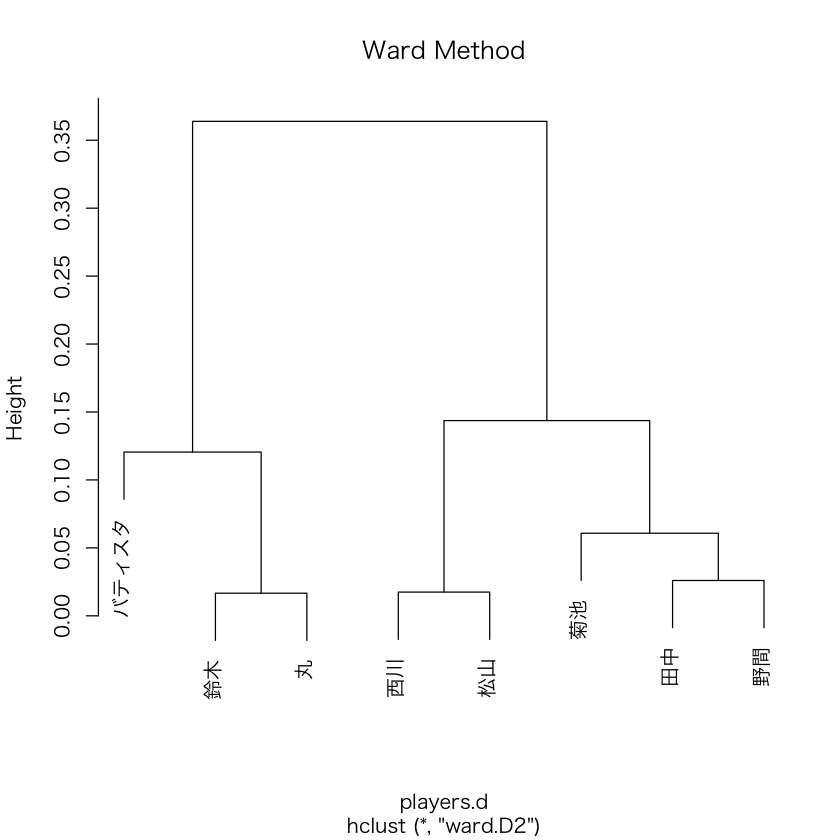

In [18]:
options(warn=-1) # 警告表示を非表示にする
par(family = "HiraKakuProN-W3") # 日本語フォントをplotするためのフォント設定
plot(result, main="Ward Method")

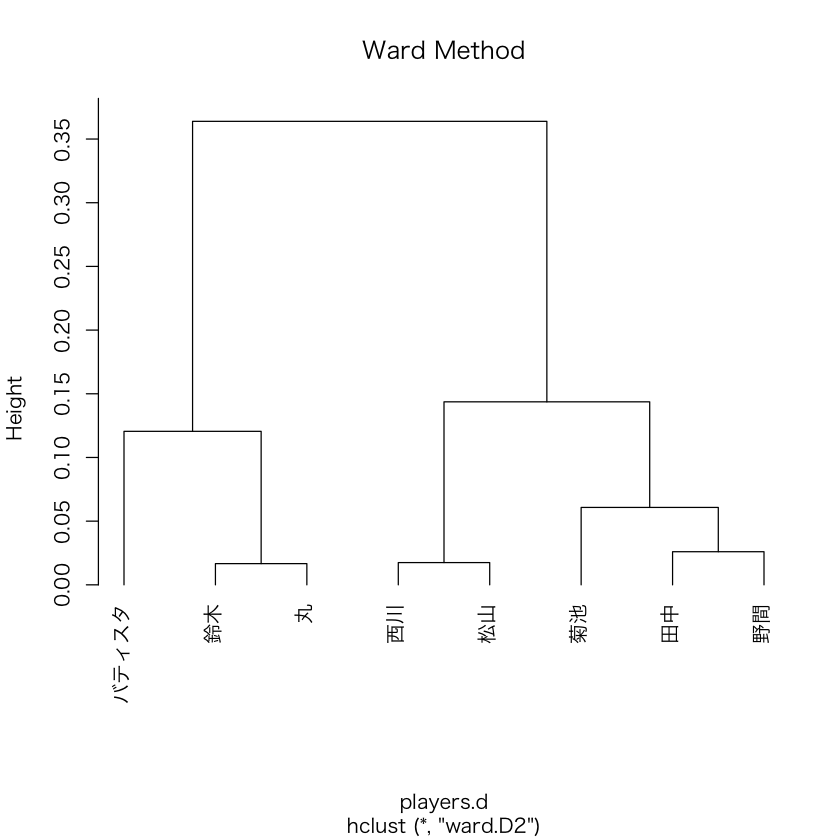

In [19]:
par(family = "HiraKakuProN-W3") # 日本語フォントをplotするためのフォント設定
plot(result, hang=-1, main="Ward Method")